In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans



In [ ]:
# Load the CSV file
rice = pd.read_csv('Rice_Cammeo_Osmancik.csv')

In [ ]:
rice.head()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
rice.describe()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [ ]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [ ]:
rice.isnull().sum()


Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [ ]:
# sns.catplot(data=rice, x='Class', kind='count')


In [ ]:
rice_2 = rice.copy()
rice_2['Class'] = rice_2['Class'].map({'Cammeo': 1, 'Osmancik': 0})

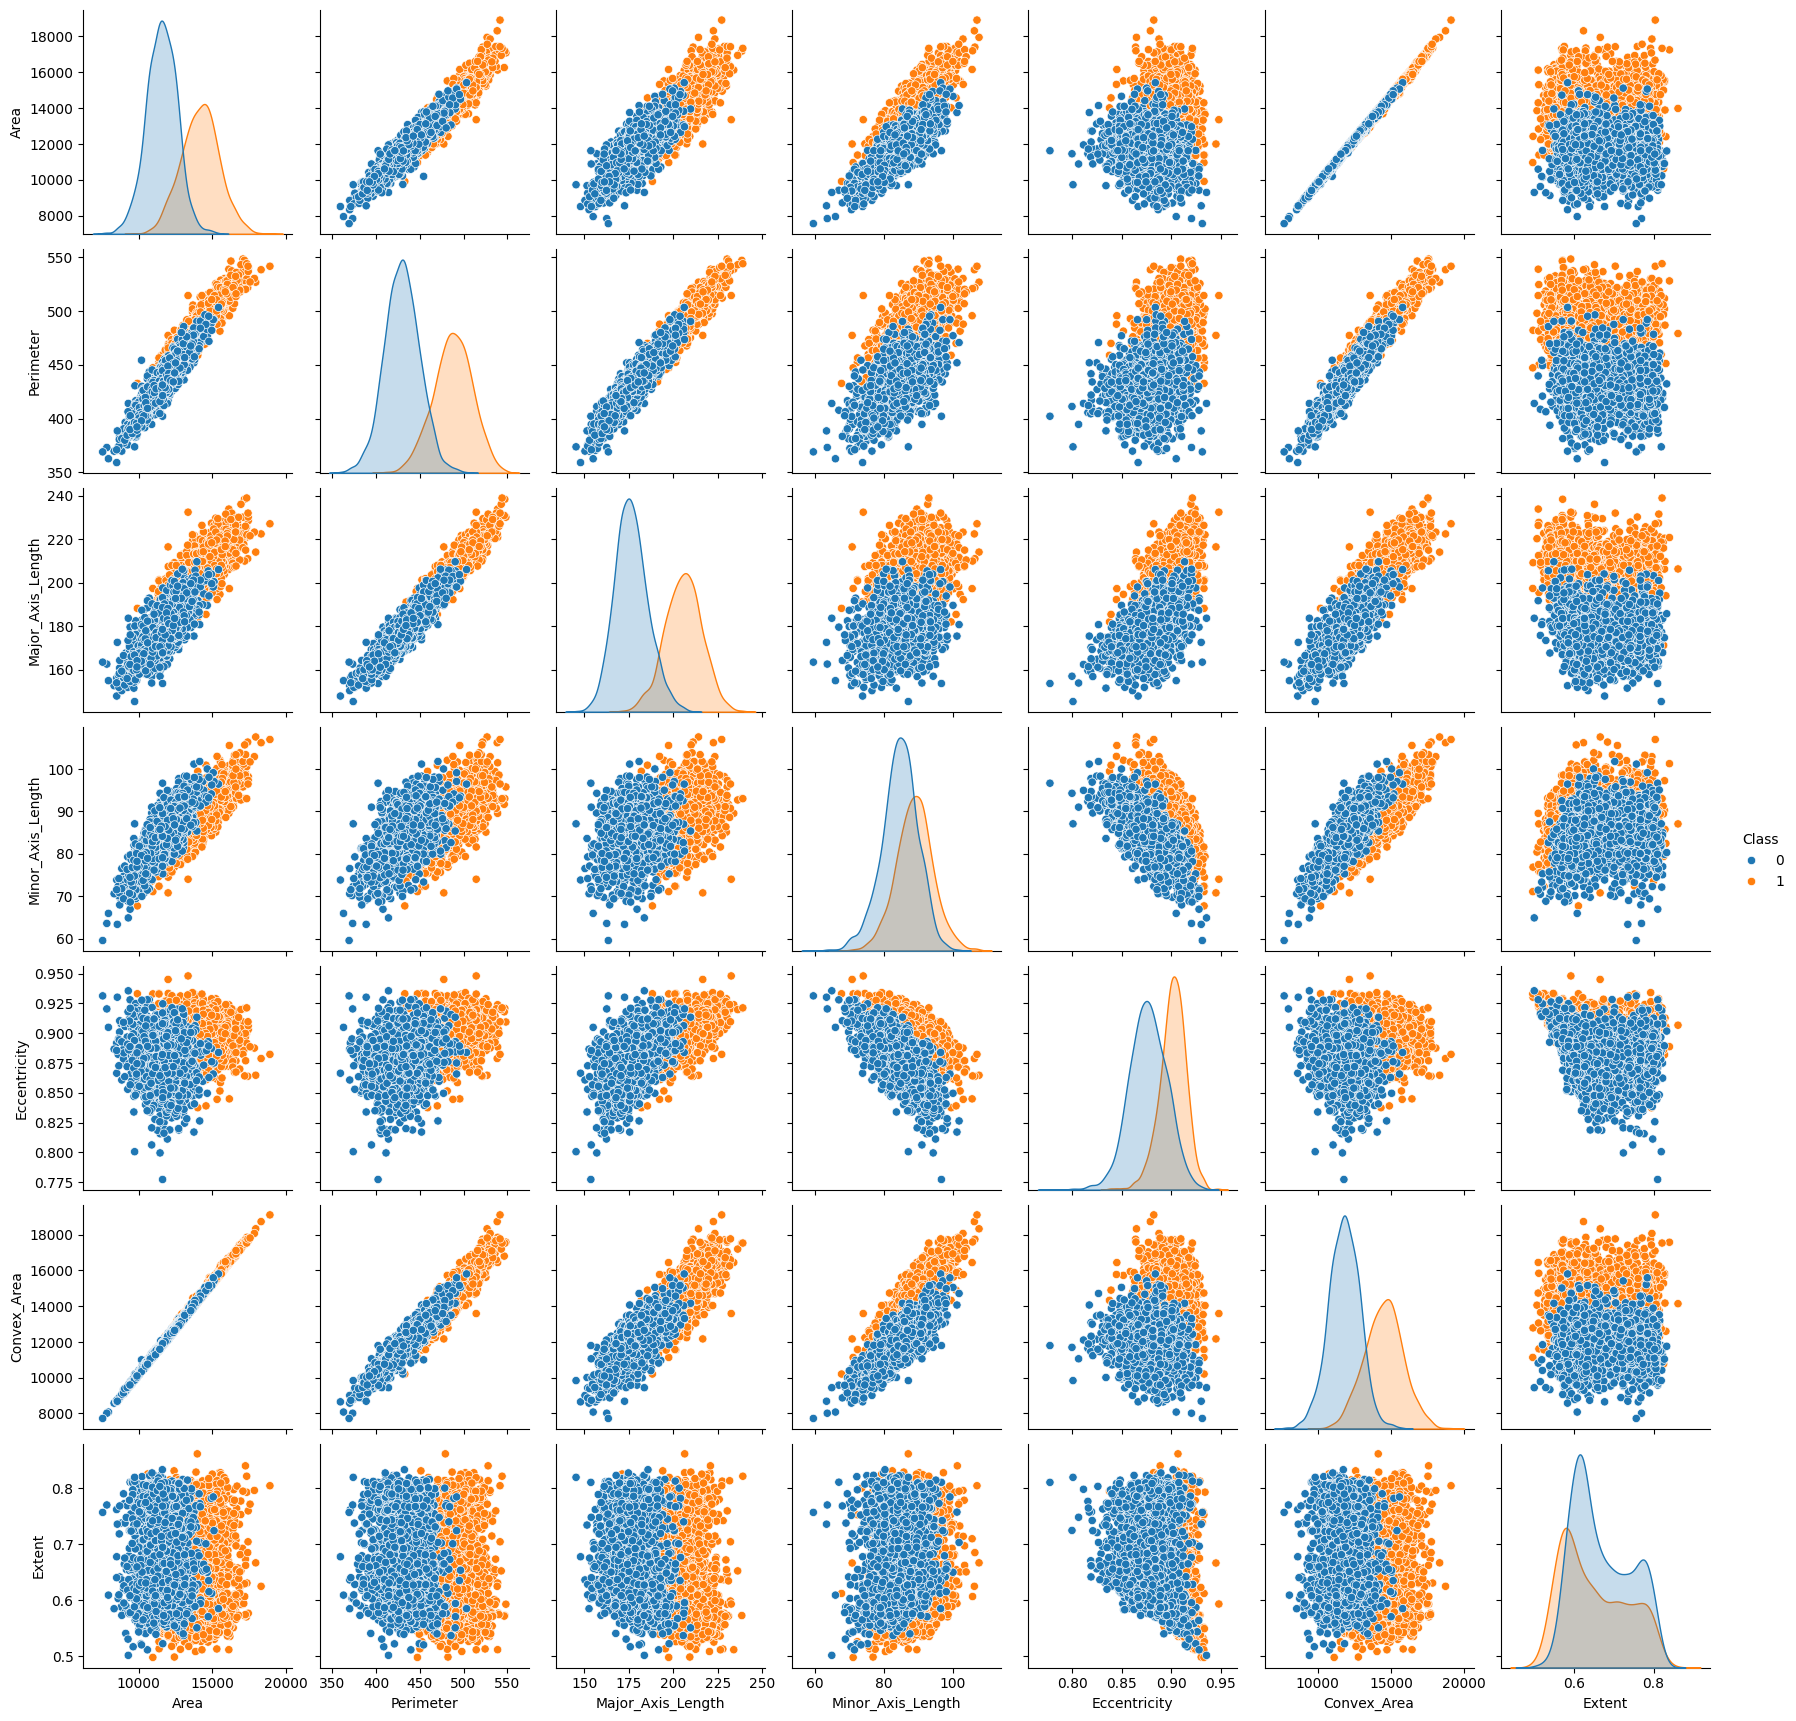

In [ ]:
sns.pairplot(rice_2, hue='Class')

In [ ]:
corr = rice_2.corr('spearman')

<Axes: >

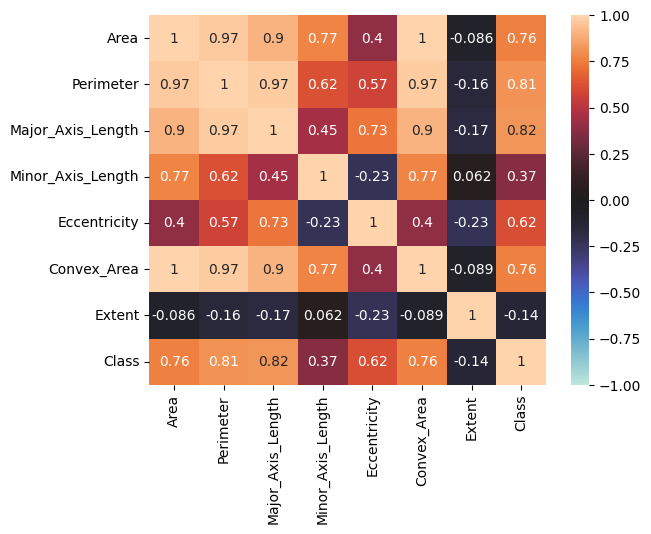

In [ ]:
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)


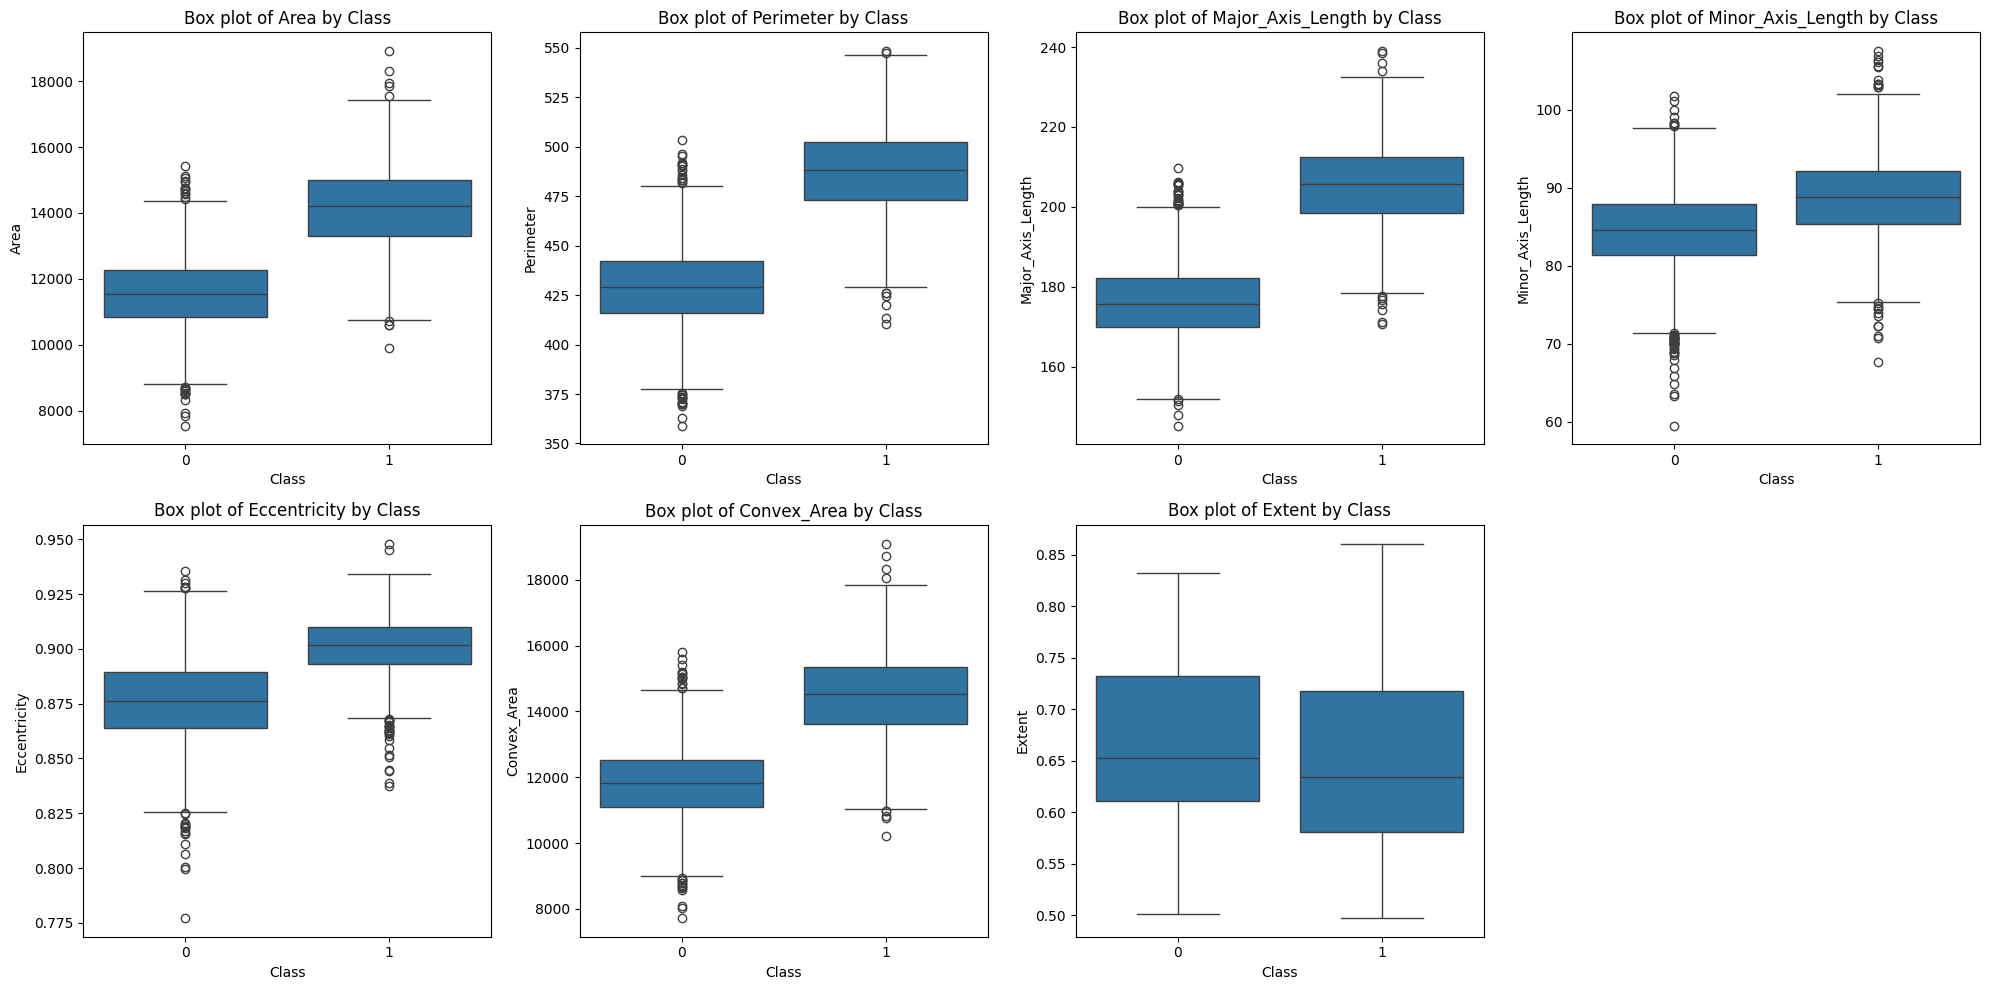

In [ ]:

# List of features to plot
features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']

# Create box plots for each feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create box plots for each feature
for i, feature in enumerate(features):
    sns.boxplot(x='Class', y=feature, data=rice_2, ax=axes[i])
    axes[i].set_title(f'Box plot of {feature} by Class')

# Remove the unused subplot (since we have 7 features and 8 subplots)
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Verify columns and target variable selection
rice_2.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [ ]:
# Assuming the last column is the target variable
X_rice_2 = rice_2.iloc[:, :-1].values
Y_rice_2 = rice_2.iloc[:, -1].values

In [ ]:
scaler_rice = StandardScaler()
X_rice_2 = scaler_rice.fit_transform(X_rice_2)

In [ ]:
X_rice_2_train, X_rice_2_test, Y_rice_2_train, Y_rice_2_test = train_test_split(X_rice_2, Y_rice_2, test_size=0.20, random_state=0)


In [ ]:
Y_rice_2_train.shape


(3048,)

In [ ]:
X_rice_2_train.shape

(3048, 7)

In [ ]:
Y_rice_2_test.shape


(762,)

In [ ]:
X_rice_2_test.shape

(762, 7)

In [ ]:
# Random Forest Classifier
Random_Forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3, random_state=0)
Random_Forest.fit(X_rice_2_train, Y_rice_2_train)
rice_2_RF = Random_Forest.predict(X_rice_2_test)

In [ ]:

print('Accuracy: ', accuracy_score(Y_rice_2_test, rice_2_RF))
print('Precision : ', precision_score(Y_rice_2_test, rice_2_RF))
print('F1 score: ', f1_score(Y_rice_2_test, rice_2_RF))
print('Recall: ', recall_score(Y_rice_2_test, rice_2_RF))
print(classification_report(Y_rice_2_test, rice_2_RF))

Accuracy:  0.9330708661417323
Precision :  0.941358024691358
F1 score:  0.9228441754916793
Recall:  0.9050445103857567
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       425
           1       0.94      0.91      0.92       337

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



<Axes: >

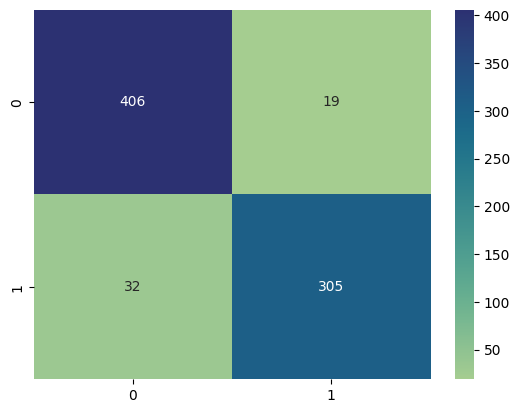

In [ ]:
sns.heatmap(confusion_matrix(Y_rice_2_test, rice_2_RF), annot=True, cmap="crest", fmt='g')


In [ ]:
# Kmeans Clustering
Kms = KMeans(n_clusters=2)
Kms.fit(X_rice_2_train)
rice_2_Kms = Kms.predict(X_rice_2_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(' accuracy: ', accuracy_score(Y_rice_2_test, rice_2_Kms))
print('precision: ', precision_score(Y_rice_2_test, rice_2_Kms))
print('F1: ', f1_score(Y_rice_2_test, rice_2_Kms))
print('Recall: ', recall_score(Y_rice_2_test, rice_2_Kms))


 accuracy:  0.916010498687664
precision:  0.9305993690851735
F1:  0.9021406727828747
Recall:  0.8753709198813057


<Axes: >

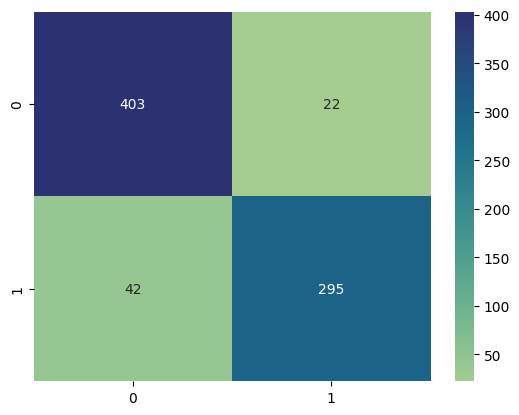

In [ ]:
sns.heatmap(confusion_matrix(Y_rice_2_test, rice_2_Kms), annot=True, cmap="crest", fmt='g')